Next steps:
1. Add a "master node" that connects all nodes together, so that message passing works between all nodes

In [1]:
import pandas as pd

from EmbedDataset import LigandBinaryDataset

import time
import numpy as np
import torch
from torch_geometric.loader import DataLoader

In [2]:
dataset = LigandBinaryDataset('./data2/')

In [3]:
dataset = dataset.shuffle()
train_dataset = dataset[:int(len(dataset) * 0.7)]
val_dataset = dataset[int(len(dataset) * 0.7):int(len(dataset) * 0.85)]
test_dataset = dataset[int(len(dataset) * 0.85):]

In [4]:
train_dl = DataLoader(train_dataset, batch_size=16)
val_dl = DataLoader(val_dataset, batch_size=16)
test_dl = DataLoader(test_dataset, batch_size=16)

In [5]:
from LigandGNNV2 import LigandGNNV2
from LigandGNNV1 import LigandGNNV1

device = torch.device('cuda')
# model = LigandGNNV1(dataset.num_node_features, 1).to(device)
model = LigandGNNV2(256, 30, dataset[0]).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min')
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=torch.FloatTensor([20]).to(device))

In [6]:
def train(model, loader, criterion, optimizer):
    model.train()

    loss_acc = 0.
    for data in loader:
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data)
        label = data.y

        loss = criterion(output, label.reshape(-1, 1))
        loss.backward()
        loss_acc += data.num_graphs * loss.item()
        optimizer.step()

    return loss_acc / len(loader.dataset)

In [7]:
from sklearn.metrics import f1_score, precision_recall_curve, roc_curve, auc, precision_recall_fscore_support, roc_auc_score

def evaluate(model, loader):
    model.eval()

    preds = np.asarray([])
    labels = np.asarray([])

    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            pred = torch.sigmoid(model(data).round().squeeze().cpu()).round().numpy()
            label = data.y.cpu().numpy()

            preds = np.concatenate([preds, pred])
            labels = np.concatenate([labels, label])

    precision, recall, _ = precision_recall_curve(labels, preds)
    fpr, tpr, thresholds = roc_curve(labels, preds, pos_label=1)
    print(precision_recall_fscore_support(labels, preds))
    return auc(fpr, tpr), auc(recall, precision)
    return roc_auc_score(labels, preds)

In [8]:
train_hist = []
val_hist = []
for epoch in range(1, 201):
    s = time.time()
    loss = train(model, train_dl, criterion, optimizer)
    train_score = evaluate(model, train_dl)
    val_score = evaluate(model, val_dl)
    scheduler.step(loss)
    e = time.time()

    train_hist.append(train_score)
    val_hist.append(val_score)

    # print(f'Epoch: {epoch:03d}, Loss: {loss:.05f}, Train Score: {train_score:.05f}, Val Score: {val_score:.05f}, Time: {e - s:.05f}s')
    print(f'Epoch: {epoch:03d}, Loss: {loss:.05f}, Train Score: {train_score}, Val Score: {val_score}, Time: {e - s:.05f}s')

(array([0.98272913, 0.07346837]), array([0.69897149, 0.66022878]), array([0.81691073, 0.13222331]), array([333686,  12064], dtype=int64))
(array([0.98530892, 0.07258788]), array([0.71870538, 0.67262152]), array([0.83115127, 0.13103476]), array([73535,  2407], dtype=int64))
Epoch: 001, Loss: 1.11332, Train Score: (0.6796001340031849, 0.37277626896230887), Val Score: (0.6956634494781304, 0.37779286850868826), Time: 21.99421s
(array([0.97698832, 0.11502621]), array([0.88160426, 0.42564655]), array([0.92684871, 0.18110958]), array([333686,  12064], dtype=int64))
(array([0.97968651, 0.11289632]), array([0.88737336, 0.43788949]), array([0.93124781, 0.1795112 ]), array([73535,  2407], dtype=int64))
Epoch: 002, Loss: 0.97524, Train Score: (0.6536254072071058, 0.28035662595604227), Val Score: (0.6626314243075565, 0.2843010162515261), Time: 16.88200s
(array([0.98334467, 0.10199635]), array([0.80116337, 0.62466844]), array([0.88295453, 0.17535981]), array([333686,  12064], dtype=int64))
(array([0

KeyboardInterrupt: 

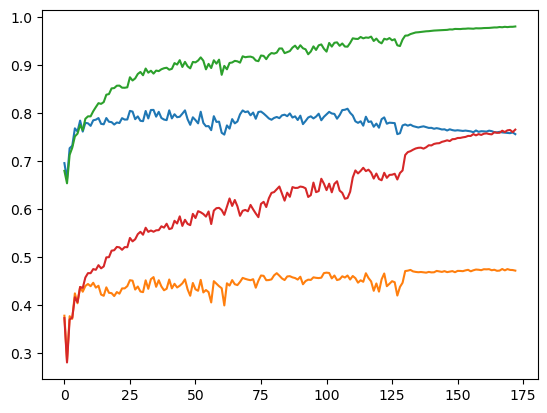

In [9]:
import matplotlib.pyplot as plt
plt.plot(val_hist)
plt.plot(train_hist)
plt.show()

In [10]:
evaluate(model, test_dl)

(array([0.9830061 , 0.36821161]), array([0.96287023, 0.56521739]), array([0.97283398, 0.44592488]), array([72691,  2783], dtype=int64))


(0.7640438114161611, 0.47473050640745146)

In [20]:
data = test_dl.dataset[4].to(device)

In [21]:
pred = model(data)

In [22]:
out = torch.sigmoid(pred).round()
out

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [23]:
print(out.sum())
print(len(out))

tensor(30., device='cuda:0', grad_fn=<SumBackward0>)
458


In [24]:
len(data.y) / data.y.sum()

tensor(14.3125, device='cuda:0')

In [25]:
data.y.sum()

tensor(32., device='cuda:0')

In [26]:
f1_score(data.y.detach().cpu().numpy(), out.detach().cpu().numpy())

0.5806451612903225

In [19]:
torch.save(model.state_dict(), './models/modelV1.pt')